In [1]:
# Data Science
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Visualización
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

dev = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
dev

device(type='cuda', index=0)

# Lectura

In [2]:
df = pd.read_csv("../Datos/trimestrales-pib.csv", index_col=[0,1])
df

Impuestos sobre los productos, netos  Agricultura  \
Año  Trimestre                                                      
1993 T1                                     388594.0     216828.0   
     T2                                     388084.0     209611.0   
     T3                                     379390.0     179794.0   
     T4                                     422664.0     245272.0   
1994 T1                                     409250.0     212307.0   
...                                              ...          ...   
2019 T3                                     822448.0     269969.0   
     T4                                     849938.0     454425.0   
2020 T1                                     774944.0     355884.0   
     T2                                     627575.0     388108.0   
     T3                                     713290.0     305998.0   

                Cría y explotación de animales  Aprovechamiento forestal  \
Año  Trimestre                                                             
1993 T1                               111883.0                   17803.0   
     T2                               126136.0                   17044.0   
     T3                               146416.0                   16858.0   
     T4                               133375.0                   16537.0   
1994 T1                               110839.0                   16421.0   
...                                        ...                       ...   
2019 T3                               187821.0                   19273.0   
     T4                               196956.0                   20543.0   
2020 T1                               174004.0                   18816.0   
     T2                               180821.0                   15257.0   
     T3                               193131.0                   17010.0   

                Pesca, caza y captura  \
Año  Trimestre                          
1993 T1                        9059.0   
     T2                       10803.0   
     T3                        8911.0   
     T4                       10099.0   
1994 T1                        9077.0   
...                               ...   
2019 T3                       15774.0   
     T4                       17219.0   
2020 T1                       12756.0   
     T2                       14752.0   
     T3                       14996.0   

                Servicios relacionados con las actividades agropecuarias y forestales  \
Año  Trimestre                                                                          
1993 T1                                                     649.0                       
     T2                                                     498.0                       
     T3                                                     582.0                       
     T4                                                     730.0                       
1994 T1                                                     890.0                       
...                                                           ...                       
2019 T3                                                    1439.0                       
     T4                                                    4584.0                       
2020 T1                                                    1653.0                       
     T2                                                    1214.0                       
     T3                                                    1056.0                       

                Extracción de petróleo y gas  \
Año  Trimestre                                 
1993 T1                             865047.0   
     T2                             895218.0   
     T3                             901125.0   
     T4                             923834.0   
1994 T1                             895605.0   
...                                      ...   
2019 T3                             607141.0   
     

In [18]:
totales = df.sum(axis=1)
totales

Año   Trimestre
1993  T1           9.875685e+08
      T2           1.027906e+09
      T3           1.068169e+09
      T4           1.113362e+09
1994  T1           1.155373e+09
                       ...     
2019  T3           1.489487e+10
      T4           1.508807e+10
2020  T1           1.565476e+10
      T2           1.686421e+10
      T3           1.728451e+10
Length: 111, dtype: float64

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
min_max_data = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns)
min_max_data.set_index(df.index, inplace = True)
min_max_data.describe()

,"Impuestos sobre los productos, netos",Agricultura,Cría y explotación de animales,Aprovechamiento forestal,"Pesca, caza y captura",Servicios relacionados con las actividades agropecuarias y forestales,Extracción de petróleo y gas,"Minería de minerales metálicos y no metálicos, excepto petróleo y gas",Servicios relacionados con la minería,"Generación, transmisión y distribución de energía eléctrica",...,Hospitales,Residencias de asistencia social y para el cuidado de la salud. Otros servicios de asistencia social,"Servicios artísticos, culturales y deportivos, y otros servicios relacionados","Museos, sitios históricos, zoológicos y similares. Servicios de entretenimiento en instalaciones recreativas y otros servicios recreativos",Servicios de alojamiento temporal,Servicios de preparación de alimentos y bebidas,Servicios de reparación y mantenimiento,Servicios personales,Asociaciones y organizaciones. Hogares con empleados domésticos,"Actividades legislativas, gubernamentales, de impartición de justicia y de organismos internacionales y extraterritoriales"
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,...,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.429995,0.403813,0.499442,0.438132,0.306474,0.191867,0.609677,0.446877,0.417213,0.423630,...,0.517649,0.789761,0.467739,0.740292,0.591283,0.577778,0.501633,0.498370,0.434471,0.339474
std,0.261000,0.222693,0.242757,0.220269,0.204249,0.167481,0.269923,0.323961,0.252439,0.300535,...,0.228733,0.134718,0.201530,0.122971,0.199023,0.146518,0.236825,0.281583,0.282604,0.287762
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.232361,0.251526,0.300635,0.253386,0.164960,0.116292,0.512786,0.184286,0.207868,0.143718,...,0.375634,0.736573,0.317008,0.699425,0.444643,0.476422,0.328262,0.246003,0.205355,0.086605
50%,0.407233,0.360148,0.513869,0.430736,0.268184,0.151986,0.597200,0.362309,0.424049,0.446086,...,0.588732,0.801763,0.444661,0.744239,0.537521,0.575975,0.573759,0.502995,0.445280,0.208230
75%,0.571433,0.540305,0.695309,0.592799,0.402617,0.209269,0.832074,0.799800,0.598721,0.689178,...,0.696204,0.852511,0.612391,0.790015,0.703859,0.666654,0.680294,0.720216,0.699648,0.606466
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
st_scaler = StandardScaler()
st_data = pd.DataFrame(st_scaler.fit_transform(df), columns = df.columns)
st_data.set_index(df.index, inplace = True)
st_data.describe()

,"Impuestos sobre los productos, netos",Agricultura,Cría y explotación de animales,Aprovechamiento forestal,"Pesca, caza y captura",Servicios relacionados con las actividades agropecuarias y forestales,Extracción de petróleo y gas,"Minería de minerales metálicos y no metálicos, excepto petróleo y gas",Servicios relacionados con la minería,"Generación, transmisión y distribución de energía eléctrica",...,Hospitales,Residencias de asistencia social y para el cuidado de la salud. Otros servicios de asistencia social,"Servicios artísticos, culturales y deportivos, y otros servicios relacionados","Museos, sitios históricos, zoológicos y similares. Servicios de entretenimiento en instalaciones recreativas y otros servicios recreativos",Servicios de alojamiento temporal,Servicios de preparación de alimentos y bebidas,Servicios de reparación y mantenimiento,Servicios personales,Asociaciones y organizaciones. Hogares con empleados domésticos,"Actividades legislativas, gubernamentales, de impartición de justicia y de organismos internacionales y extraterritoriales"
count,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,...,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02
mean,2.000402e-16,7.451497e-17,2.720547e-16,-8.941796e-16,-8.001607e-18,1.310263e-16,2.480498e-16,-1.740350e-16,1.210243e-16,6.401286e-17,...,4.160836e-16,3.840772e-16,4.400884e-17,-3.440691e-16,2.240450e-16,-5.641133e-16,-5.496104e-16,-1.155857e-16,-1.540309e-16,-4.460896e-16
std,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,...,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00
min,-1.654963e+00,-1.821546e+00,-2.066701e+00,-1.998097e+00,-1.507299e+00,-1.150801e+00,-2.268953e+00,-1.385673e+00,-1.660226e+00,-1.415981e+00,...,-2.273375e+00,-5.888915e+00,-2.331466e+00,-6.047336e+00,-2.984402e+00,-3.961276e+00,-2.127762e+00,-1.777917e+00,-1.544355e+00,-1.185053e+00
25%,-7.606547e-01,-6.869460e-01,-8.226652e-01,-8.425332e-01,-6.959935e-01,-4.532900e-01,-3.605830e-01,-8.142400e-01,-8.330510e-01,-9.356046e-01,...,-6.236890e-01,-3.965985e-01,-7.513246e-01,-3.338399e-01,-7.401383e-01,-6.949008e-01,-7.353843e-01,-9.003096e-01,-8.144082e-01,-8.827264e-01
50%,-8.760607e-02,-1.969677e-01,5.969833e-02,-3.373009e-02,-1.883216e-01,-2.392024e-01,-4.643396e-02,-2.622255e-01,2.720163e-02,7.505767e-02,...,3.121793e-01,8.949316e-02,-1.150331e-01,3.224089e-02,-2.713524e-01,-1.236218e-02,3.059358e-01,1.650026e-02,3.842335e-02,-4.581531e-01
75%,5.443655e-01,6.156948e-01,8.105022e-01,7.053539e-01,4.728455e-01,1.043737e-01,8.276659e-01,1.094345e+00,7.222784e-01,8.875909e-01,...,7.841666e-01,4.679008e-01,7.210252e-01,4.061793e-01,5.682096e-01,6.093388e-01,7.578204e-01,7.914270e-01,9.425901e-01,9.320311e-01
max,2.193834e+00,2.689315e+00,2.071321e+00,2.562390e+00,3.410889e+00,4.847104e+00,1.452616e+00,1.715122e+00,2.319095e+00,1.926512e+00,...,2.118359e+00,1.567661e+00,2.653082e+00,2.121512e+00,2.062932e+00,2.894774e+00,2.113907e+00,1.789545e+00,2.010210e+00,2.305799e+00


In [25]:
min_max_data.to_csv("../Datos/min_max_df.csv")
st_data.to_csv("../Datos/st_df.csv")

# División de datos

In [99]:
def dividir_series(serie_x, serie_y, test_size):
    n_obs = serie_x.shape[0]
    n = int(n_obs*(1-test_size))
    return serie_x[:n], serie_x[n:], serie_y[:n], serie_y[n:]

In [7]:
X_train, X_test, y_train, y_test = dividir_series(df.values, totales.values, 0.1)

In [25]:
X_train, X_test, y_train, y_test = dividir_series(min_max_data.values, totales.values, 0.1)

In [7]:
X_train, X_test, y_train, y_test = dividir_series(st_data.values, totales.values, 0.1)

# Reducción

In [8]:
n_components = 4
pca = PCA(n_components=n_components)
X_train_r = pca.fit_transform(X_train)
X_test_r = pca.transform(X_test)
X_train_r.shape, X_test_r.shape

((99, 4), (12, 4))

# Preparación

In [9]:
def preparar_entrada(X, y, k):
    end = X.shape[0] - k + 1
    Xl = []
    yl = []
    for i in range(end-1):
        Xt = X[i:i+k,:]
        yt = y[i+k]
        Xl.append(Xt.ravel())
        yl.append(yt)
    
    X_new = torch.Tensor(Xl).to(dev)
    y_new = torch.Tensor(yl).to(dev)
    return X_new, y_new

In [10]:
t_ventana = 4
X_train_t, y_train_t = preparar_entrada(X_train_r, y_train, t_ventana)
X_test_t, y_test_t = preparar_entrada(X_test_r, y_test, t_ventana)

In [11]:
X_train_t.shape, X_test_t.shape

(torch.Size([95, 16]), torch.Size([8, 16]))

In [12]:
def calcular_r2(y_pred, y_true):
    ss_res = ((y_true - y_pred)**2).sum()
    y_mean = y_true.mean()
    ss_total = ((y_true - y_mean)**2).sum()
    
    return 1 - (ss_res/ss_total)

# Modelo MLP

In [13]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super().__init__()
        t_ventana, n_vars = input_dim
        self.entrada = nn.Linear(t_ventana*n_vars, hidden_units)
        self.salida = nn.Linear(hidden_units, 1)
        
    def forward(self, x):
        x = F.relu(self.entrada(x))
        x = self.salida(x)
        return x.flatten()

Inicia
Termina el entrenamiento
CPU times: user 47.2 s, sys: 714 ms, total: 47.9 s
Wall time: 47.9 s


(tensor(0.9916, device='cuda:0', grad_fn=<RsubBackward1>),
 tensor(0.2672, device='cuda:0', grad_fn=<RsubBackward1>))

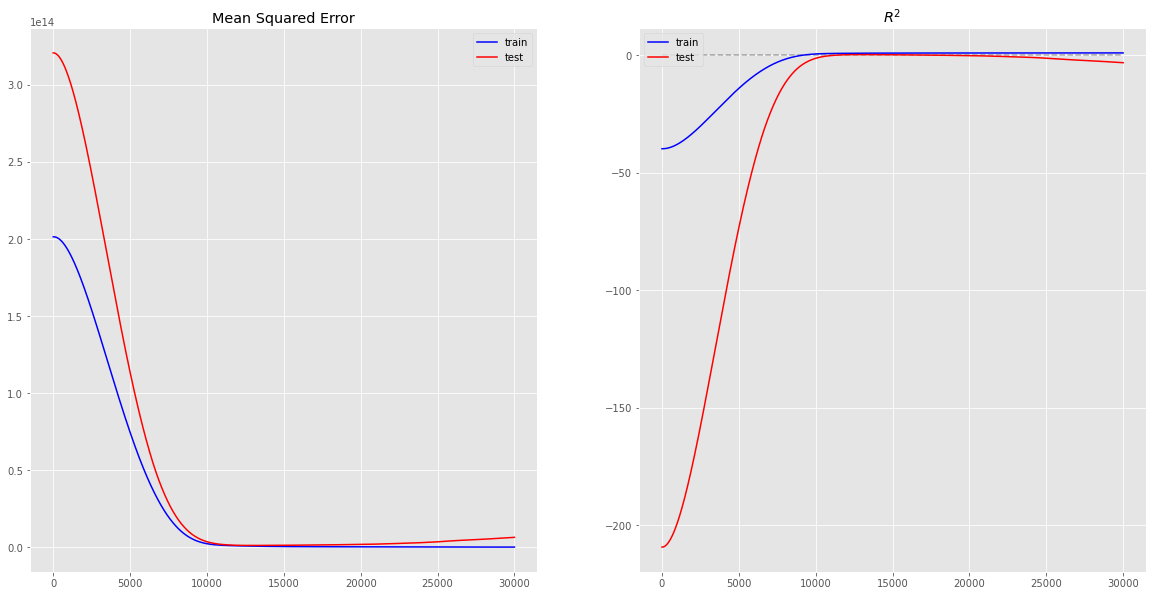

In [16]:
%%time
hidden_units = 81 # se recomienda 2n + 1

input_dim = (t_ventana, n_components)

red = MLP(input_dim, hidden_units)
red.to(dev)

loss_function = nn.MSELoss()
optimizer = optim.Adam(red.parameters(), lr=0.01)

epochs = 30_000
mse_train = []
mse_test = []

r2_train = []
r2_test = []

print("Inicia")
for epoch in range(epochs):
    
    red.zero_grad()
    y_pred = red(X_train_t).to(dev)
    
    loss = loss_function(y_pred, y_train_t)
    mse_train.append(loss)
    r2_train.append( calcular_r2(y_pred, y_train_t ) )
    loss.backward()
    optimizer.step()
    
    # Validate
    y_pred = red(X_test_t).to(dev)
    loss = loss_function(y_pred, y_test_t)
    mse_test.append(loss)
    r2_test.append( calcular_r2(y_pred, y_test_t ) )

print("Termina el entrenamiento")

fig, ax = plt.subplots(ncols=2, figsize=(20,10))
ax[0].plot(mse_train, label="train", color="blue")
ax[0].plot(mse_test, label="test", color="red")
ax[0].set_title("Mean Squared Error")
ax[0].legend()


ax[1].plot(r2_train, label="train", color="blue")
ax[1].plot(r2_test, label="test", color="red")
ax[1].set_title("$R^2$")
#ax[1].set_ylim(0,1)
ax[1].hlines(0, xmin=0, xmax=epochs, ls="--", alpha=0.3, color="black")
ax[1].legend()

np.max(r2_train), np.max(r2_test)

# Notas:
* Al parecer Adagrad es una cagada, o de menos no lo sabemos usar bien ("nosotros somos la cagada" - Óscar)
* Es relativamente normal tener que hacer muchas _epochs_
* Para la capa oculta, se recomiendan que sean al menos $2n + 1$ siendo $n$ el número de neuronas en la capa de entrada, es decir, número de variables

# Intentos

* 0.9539
    * estandarización
    * 4 componentes principales
    * tamaño ventana = 10
    * 81 neuronas en capa oculta
    * Adam con lr=0.01
    * 8000 epochs
    * **nota**: en este sale el train más bajo (0.7494)

* 0.9453
    * estandarización
    * 4 componentes principales
    * tamaño ventana = 10
    * 81 neuronas en capa oculta
    * Adam con lr=0.01
    * 15000 epochs

* 0.5389
    * Sin normalización o estandarización
    * 4 componentes principales
    * tamaño ventana = 10
    * 81 neuronas en capa oculta
    * Adam con lr=0.01
    * 15000 epochs
    
* 0.5266
    * Normalización minmax
    * 4 componentes principales
    * tamaño ventana = 10
    * 81 neuronas en capa oculta
    * Adam con lr=0.01
    * 15000 epochs
    
* 0.3558
    * estandarización
    * 4 componentes principales
    * tamaño ventana = 4
    * 81 neuronas en capa oculta
    * Adam con lr=0.01
    * 15000 epochs
    
* -0.0005
    * Sin normalización o estandarización
    * 4 componentes principales
    * tamaño ventana = 10
    * 81 neuronas en capa oculta
    * Adam con lr=0.01
    * 7500 epochs

---------------
# Con variables económicas

In [17]:
df = pd.read_csv("../Datos/variables-politicas-monetaria.csv", index_col=[0,1])
df

Base Monetaria             M1            M2  Inflacion  \
Año  Trimestre                                                           
1993 T1            3.617908e+07  2.802916e+08  6.710978e+08   1.130000   
     T2            3.579491e+07  2.904517e+08  7.016594e+08   0.513333   
     T3            3.570483e+07  3.002878e+08  7.321765e+08   0.613333   
     T4            4.085851e+07  3.098260e+08  7.626778e+08   0.440000   
1994 T1            4.308890e+07  3.190927e+08  7.931914e+08   0.746667   
...                         ...           ...           ...        ...   
2019 T3            1.562234e+09  4.351109e+09  8.981530e+09   0.253333   
     T4            1.642256e+09  4.393462e+09  9.052353e+09   0.293333   
2020 T1            1.712852e+09  4.619618e+09  9.322294e+09   0.326667   
     T2            1.833235e+09  5.047059e+09  9.983913e+09   0.343333   
     T3            1.909298e+09  5.221241e+09  1.015398e+10   0.346667   

                tasa_interes  Tipo_cambio  
Año  Trimestre                             
1993 T1             1.130000     3.107135  
     T2             0.513333     3.113394  
     T3             0.613333     3.117846  
     T4             0.440000     3.121773  
1994 T1             0.746667     3.227980  
...                      ...          ...  
2019 T3             0.253333    19.391890  
     T4             0.293333    19.192773  
2020 T1             0.326667    20.818174  
     T2             0.343333    22.582584  
     T3             0.346667    21.801972  

[111 rows x 6 columns]

In [20]:
X_train, X_test, y_train, y_test = dividir_series(df.values, totales.values, 0.1)

In [23]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [24]:
t_ventana = 10
X_train_t, y_train_t = preparar_entrada(X_train_st, y_train, t_ventana)
X_test_t, y_test_t = preparar_entrada(X_test_st, y_test, t_ventana)

Inicia
Se alcanzó el máximo en 14084
Termina el entrenamiento
Train RMSE tensor(2.2748e+09, device='cuda:0', grad_fn=<SqrtBackward>)
Test RMSE tensor(77299080., device='cuda:0', grad_fn=<SqrtBackward>)
----------
Train R^2 tensor(0.5149, device='cuda:0', grad_fn=<RsubBackward1>)
Test R^2 tensor(0.8647, device='cuda:0', grad_fn=<RsubBackward1>)
CPU times: user 19.9 s, sys: 200 ms, total: 20.1 s
Wall time: 20.2 s


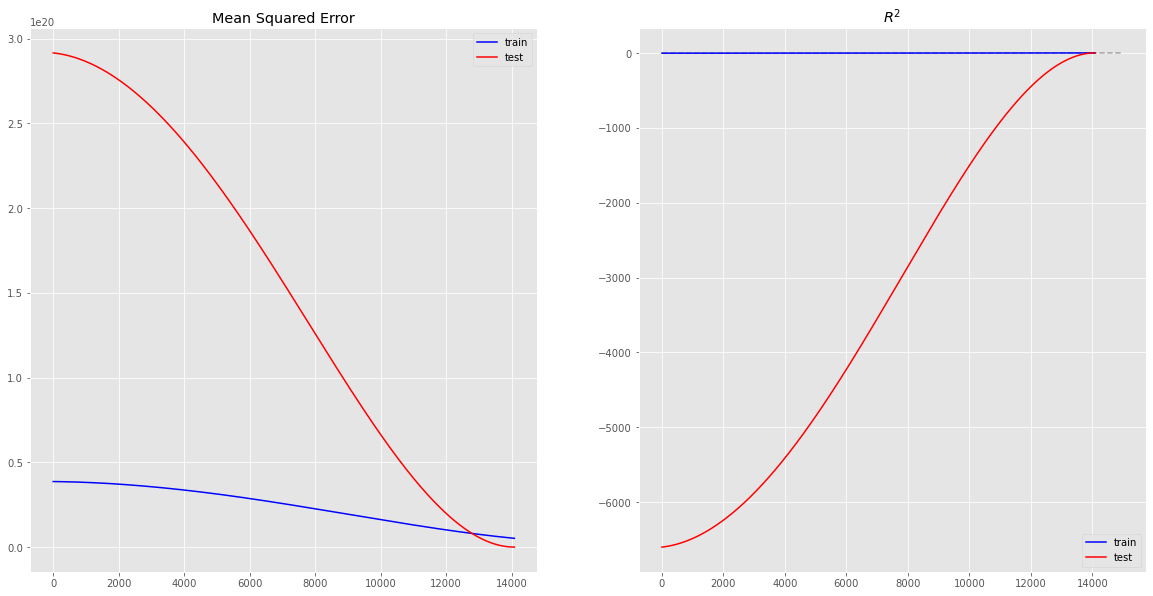

In [62]:
%%time
hidden_units = 128 # se recomiendan al menos 2n + 1
input_dim = (t_ventana, df.shape[1])

red = MLP(input_dim, hidden_units)
red.to(dev)

loss_function = nn.MSELoss()
optimizer = optim.RMSprop(red.parameters(), lr=0.1)

mse_train = []
mse_test = []

r2_train = []
r2_test = []

print("Inicia")
epochs = 15000
r2_previous_test = float("-inf")
for epoch in range(epochs):
    
    red.zero_grad()
    y_pred = red(X_train_t).to(dev)
    
    loss = loss_function(y_pred, y_train_t)
    mse_train.append(loss)
    r2_train.append( calcular_r2(y_pred, y_train_t ) )
    loss.backward()
    optimizer.step()
    
    # Validate
    y_pred = red(X_test_t).to(dev)
    loss = loss_function(y_pred, y_test_t)
    mse_test.append(loss)
    r2_current_test = calcular_r2(y_pred, y_test_t ) 
    r2_test.append(r2_current_test)
    
    if r2_previous_test > r2_current_test:
        print("Se alcanzó el máximo en", epoch-1)
        break
    else:
        r2_previous_test = r2_current_test
    
    

print("Termina el entrenamiento")

fig, ax = plt.subplots(ncols=2, figsize=(20,10))
ax[0].plot(mse_train, label="train", color="blue")
ax[0].plot(mse_test, label="test", color="red")
ax[0].set_title("Mean Squared Error")
ax[0].legend()

ax[1].plot(r2_train, label="train", color="blue")
ax[1].plot(r2_test, label="test", color="red")
ax[1].set_title("$R^2$")
#ax[1].set_ylim(0,1)
ax[1].hlines(0, xmin=0, xmax=epochs, ls="--", alpha=0.3, color="black")
ax[1].legend()


print("Train RMSE", mse_train[-1].sqrt())
print("Test RMSE", mse_test[-1].sqrt())
print("-"*10)
print("Train R^2", r2_train[-1])
print("Test R^2", r2_test[-1])

In [63]:
np.max(r2_test)

tensor(0.8649, device='cuda:0', grad_fn=<RsubBackward1>)

In [74]:
y_pred_train.shape

(89,)

In [82]:
X_plot1.size

89

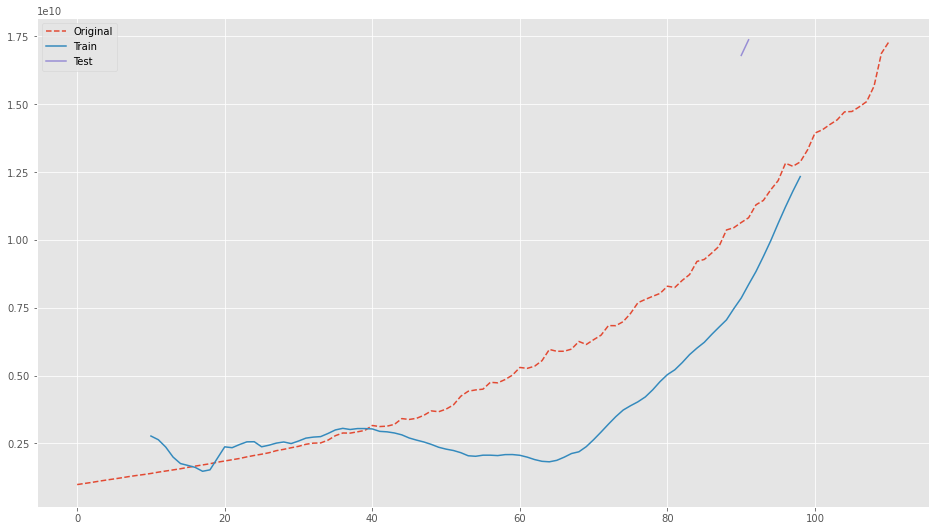

In [79]:
with torch.no_grad():
    y_pred_train = red(X_train_t).cpu().detach().numpy()
    y_pred_test = red(X_test_t).cpu().detach().numpy()

X_plot1 = np.arange(t_ventana, y_pred_train.size+t_ventana)
X_plot2 = np.arange(X_plot1.size+1, X_plot1.size + y_pred_test.size+1)
    
plt.figure(figsize=(16,9))
plt.plot(totales.values, label="Original", ls="--")
plt.plot(X_plot1, y_pred_train, label="Train")
plt.plot(X_plot2, y_pred_test, label="Test")
plt.legend()

In [72]:
y_pred_test

array([1.6788485e+10, 1.7363358e+10], dtype=float32)

# Cambiando el orden...

La función de `preparar_entrada` es la que nos hace sacrificar una cantidad de datos

In [83]:
scaler = StandardScaler()
X = scaler.fit_transform(df.values)
X.shape

(111, 6)

In [95]:
t_ventana = 10
X_prep, y_prep = preparar_entrada(X, totales.values, t_ventana)

In [108]:
X_train_t, X_test_t, y_train_t, y_test_t = dividir_series(X_prep, y_prep, 0.1)

In [109]:
X_train_t.shape

torch.Size([90, 60])

In [110]:
X_test_t.shape

torch.Size([11, 60])

In [113]:
X_train_t.shape[1]*t_ventana

600

In [114]:
X_train_t.shape

torch.Size([90, 60])

Inicia
Termina el entrenamiento
Train RMSE tensor(5.2503e+08, device='cuda:0', grad_fn=<SqrtBackward>)
Test RMSE tensor(7.3873e+08, device='cuda:0', grad_fn=<SqrtBackward>)
----------
Train R^2 tensor(0.9755, device='cuda:0', grad_fn=<RsubBackward1>)
Test R^2 tensor(0.5079, device='cuda:0', grad_fn=<RsubBackward1>)
CPU times: user 41.6 s, sys: 488 ms, total: 42.1 s
Wall time: 42.1 s


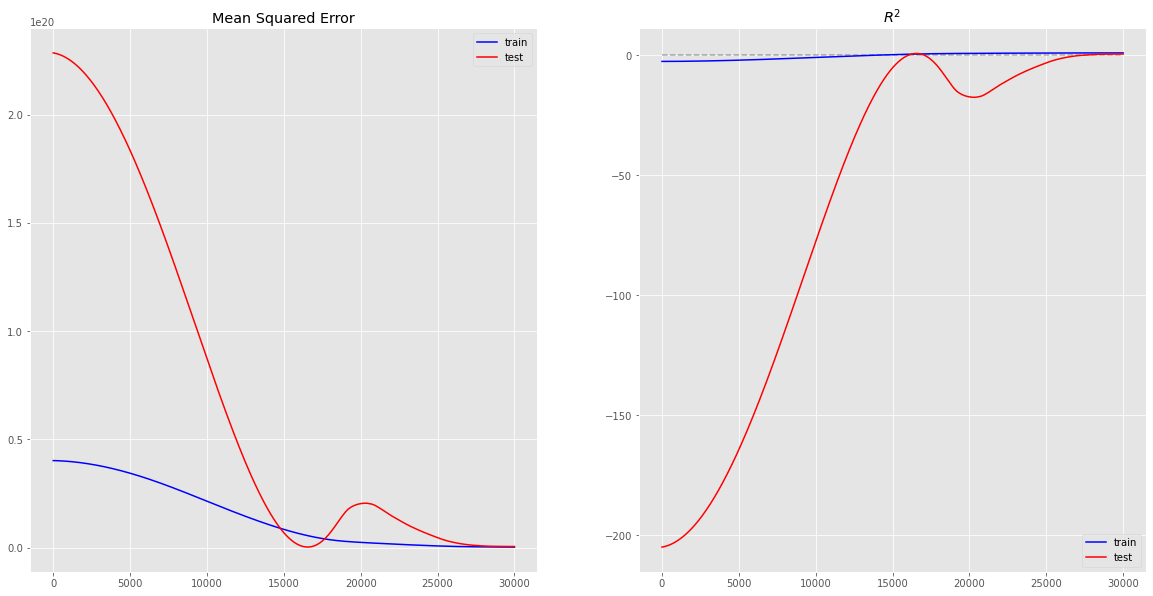

In [127]:
%%time
hidden_units = 128 # se recomiendan al menos 2n + 1
input_dim = (t_ventana, X.shape[1])

red = MLP(input_dim, hidden_units)
red.to(dev)

loss_function = nn.MSELoss()
optimizer = optim.RMSprop(red.parameters(), lr=0.1)

mse_train = []
mse_test = []

r2_train = []
r2_test = []

print("Inicia")
epochs = 30_000
r2_previous_test = float("-inf")
stop_at_best = False
for epoch in range(epochs):
    
    red.zero_grad()
    y_pred = red(X_train_t).to(dev)
    
    loss = loss_function(y_pred, y_train_t)
    mse_train.append(loss)
    r2_train.append( calcular_r2(y_pred, y_train_t ) )
    loss.backward()
    optimizer.step()
    
    # Validate
    y_pred = red(X_test_t).to(dev)
    loss = loss_function(y_pred, y_test_t)
    mse_test.append(loss)
    r2_current_test = calcular_r2(y_pred, y_test_t ) 
    r2_test.append(r2_current_test)
    
    if stop_at_best and r2_previous_test > r2_current_test:
        print("Se alcanzó el máximo en", epoch-1)
        break
    else:
        r2_previous_test = r2_current_test
    
    

print("Termina el entrenamiento")

fig, ax = plt.subplots(ncols=2, figsize=(20,10))
ax[0].plot(mse_train, label="train", color="blue")
ax[0].plot(mse_test, label="test", color="red")
ax[0].set_title("Mean Squared Error")
ax[0].legend()

ax[1].plot(r2_train, label="train", color="blue")
ax[1].plot(r2_test, label="test", color="red")
ax[1].set_title("$R^2$")
#ax[1].set_ylim(0,1)
ax[1].hlines(0, xmin=0, xmax=epochs, ls="--", alpha=0.3, color="black")
ax[1].legend()


print("Train RMSE", mse_train[-1].sqrt())
print("Test RMSE", mse_test[-1].sqrt())
print("-"*10)
print("Train R^2", r2_train[-1])
print("Test R^2", r2_test[-1])

In [133]:
totales

Año   Trimestre
1993  T1           9.875685e+08
      T2           1.027906e+09
      T3           1.068169e+09
      T4           1.113362e+09
1994  T1           1.155373e+09
                       ...     
2019  T3           1.489487e+10
      T4           1.508807e+10
2020  T1           1.565476e+10
      T2           1.686421e+10
      T3           1.728451e+10
Length: 111, dtype: float64

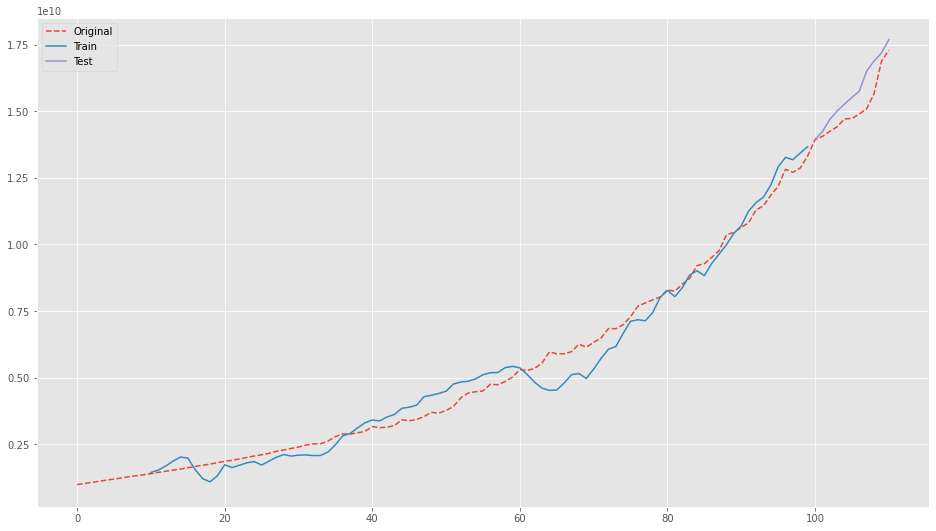

In [128]:
with torch.no_grad():
    y_pred_train = red(X_train_t).cpu().detach().numpy()
    y_pred_test = red(X_test_t).cpu().detach().numpy()

X_plot1 = np.arange(t_ventana, y_pred_train.size+t_ventana)
X_plot2 = np.arange(X_plot1.size+t_ventana, X_plot1.size + y_pred_test.size+t_ventana)
    
plt.figure(figsize=(16,9))
plt.plot(totales.values, label="Original", ls="--")
plt.plot(X_plot1, y_pred_train, label="Train")
plt.plot(X_plot2, y_pred_test, label="Test")
plt.legend()

In [135]:
y_pred_train.shape

(90,)

In [136]:
y_pred_test.shape

(11,)